In [11]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn') # matplotlib 테마

# 0. Load the Dataset

In [12]:
dat = pd.read_csv("BlackFriday.csv", encoding="UTF8")
print(dat.info())
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


`Product_Category_2`(제품의 2차 분류) 와 `Product_Category_3`(제품의 3차분류) 에 NaN값이 많아 보인다. 제품에 대한 특별한 정보가 없는 상태에서 2차 분류와 3차 분류를 대체할 값을 찾을 수 없으므로 이 column들을 drop하는 것이 나아보인다.

In [13]:
dat.drop(['Product_Category_2', 'Product_Category_3'], axis = 'columns', inplace=True)

# 1. EDA and Preprocessing

In [14]:
# Column별로 unique한 데이터의 개수를 출력하였다. 
# 이 때, unique한 데이터의 개수가 너무 많으면 앞과 뒤에서 5개씩만 print한다.
print('<Unique Value per Columns>')
for i in dat.columns:
    print('*{} : {}'.format(i, len(np.unique(dat[i]))), end = '\n\t')
    if (len(np.unique(dat[i])) > 10):
        print(np.unique(dat[i])[:5], end ='...')
        print(np.unique(dat[i])[-5:])
    else:
        print(np.unique(dat[i]))

<Unique Value per Columns>
*User_ID : 5891
	[1000001 1000002 1000003 1000004 1000005]...[1006036 1006037 1006038 1006039 1006040]
*Product_ID : 3623
	['P00000142' 'P00000242' 'P00000342' 'P00000442' 'P00000542']...['P0099442' 'P0099642' 'P0099742' 'P0099842' 'P0099942']
*Gender : 2
	['F' 'M']
*Age : 7
	['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
*Occupation : 21
	[0 1 2 3 4]...[16 17 18 19 20]
*City_Category : 3
	['A' 'B' 'C']
*Stay_In_Current_City_Years : 5
	['0' '1' '2' '3' '4+']
*Marital_Status : 2
	[0 1]
*Product_Category_1 : 18
	[1 2 3 4 5]...[14 15 16 17 18]
*Purchase : 17959
	[185 186 187 188 189]...[23956 23958 23959 23960 23961]


본 데이터셋은 블랙 프라이데이 시즌에 구매내역에 대한 내용을 담고 있다.

Variable|Unique|Explanation
:-|:-|:-
User_ID|5891|user는 총 5891명이다.
Product_ID |3623|제품은 3623가지 종류가 있다.
Gender|2|여성은 F, 남성은 M이다.
Age|7|연령은 7가지 계층으로 구분한다.
Occupation|21|직업의 종류는 21가지이다.
City_Category|3|도시는 세 종류가 있다.
Stay_In_Current_City_Years|5| 해당 도시에서 살고 있는 년수를 의미한다.
Material_Status|2| 결혼 여부를 의미한다.
Product_Category_1|18| 제품의 1차 분류는 총 18가지가 있다.
Purchase|17959| 구매 가격으로 추정된다.
  

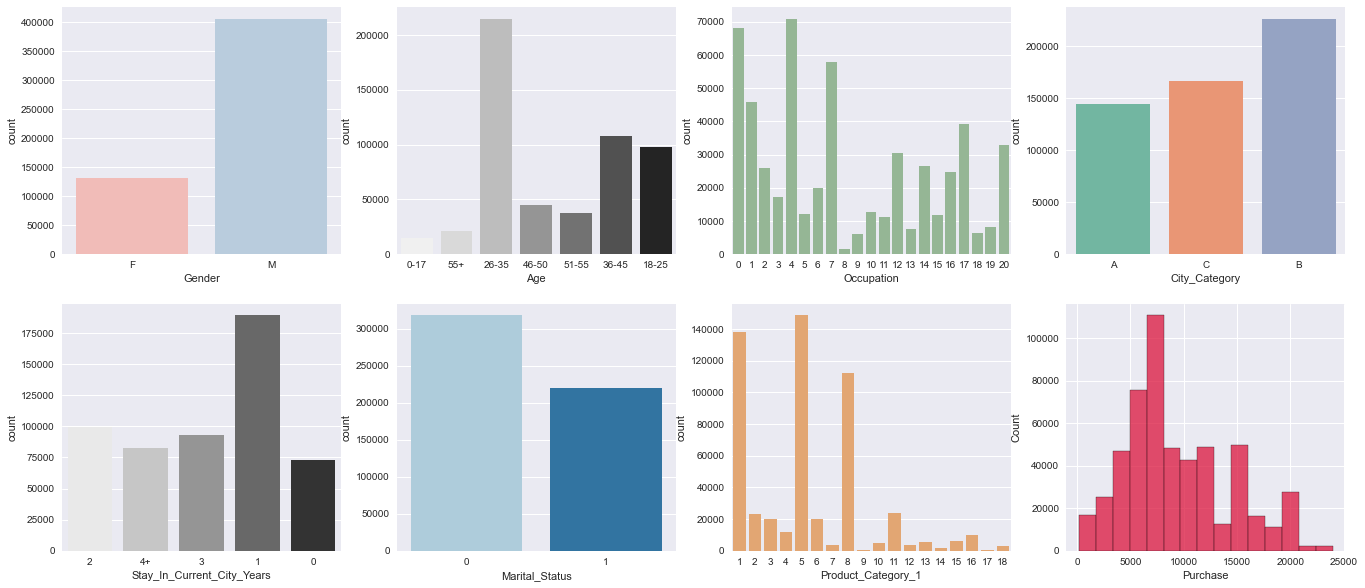

In [15]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(23, 10))
sns.countplot(x = 'Gender',data = dat, ax = axes[0][0], palette = 'Pastel1')
sns.countplot(x = "Age", data = dat, ax = axes[0][1], palette = 'Greys')
sns.countplot(x='Occupation',data = dat, ax = axes[0][2], color = 'darkseagreen')
sns.countplot(x='City_Category',data = dat, ax = axes[0][3], palette= 'Set2')

sns.countplot(x='Stay_In_Current_City_Years',data = dat, ax = axes[1][0], palette = 'Greys')
sns.countplot(x = "Marital_Status",data = dat, ax = axes[1][1], palette = 'Paired')
sns.countplot(x = 'Product_Category_1', data = dat, ax = axes[1][2], color = 'sandybrown')
sns.histplot(x = 'Purchase', data = dat, ax = axes[1][3], color = 'crimson', bins=15)
plt.show()

Variable|Note
:-|:-
Gender|남성 회원의 구매내역이 훨씬 많다. (Target)
Age|26-35세 회원의 구매내역이 가장 많다.
Occupation|4번 직업을 가진 사람이 가장 많다.
City_Category|B지역에 사는 사람이 가장 많지만 지역별 차이가 매우 크지는 않다.
Stay_In_Current_City_Years|1년간 거주한 사람이 가장 많다. 
Material_Status|미혼 고객이 다소 더 많다.
Product_Category_1|5번 분류의 제품이 가장 많이 팔렸다. 다음으로 1번, 8번 분류의 제품이 많이 팔렸다. 나머지 제품군과의 차이가 많이 난다.
Purchase|구매 가격은 7000정도가 가장 많다.

In [16]:
# 각 연령층의 중간값으로 바꿔주었다. 55세 이상은 임의로 65로 지정하였다. 
dat['Age']=dat.Age.map({'0-17':8.5, '18-25':21.5, '26-35':30.5, '36-45':40.5, '46-50':48, '51-55':53, '55+':65}) 

dat['Marital_Status']=dat.Marital_Status.map({0: 'False', 1:'True'}) 
dat['Stay_In_Current_City_Years']=dat.Stay_In_Current_City_Years.map({'0': 0, '1': 1, '2': 2, '3': 3, '4+':4})

In [17]:
#Categorical Feature들은 one-hot encoding해주었다.
data_dum = pd.get_dummies(dat.drop(['User_ID', 'Product_ID'], axis='columns'))

In [109]:
X = dat.drop(['User_ID', 'Product_ID', 'Gender'], axis='columns')
X = pd.get_dummies(X)
y = dat['Gender'] # target feature인 성별을 분리한다.
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Purchase,City_Category_A,City_Category_B,City_Category_C,Marital_Status_False,Marital_Status_True
0,8.5,10,2,3,8370,1,0,0,1,0
1,8.5,10,2,1,15200,1,0,0,1,0
2,8.5,10,2,12,1422,1,0,0,1,0
3,8.5,10,2,12,1057,1,0,0,1,0
4,65.0,16,4,8,7969,0,0,1,1,0


## 2. KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size = 0.3)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

데이터의 크기 분포에 대한 차이가 너무 크면, 하나의 feature가 class를 결정하는 데 너무 큰 영향을 미치므로 scaler를 사용하여 정규화를 해준다.

In [74]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':range(1, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1, scoring='accuracy')
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 55.1min finished


GridSearchCV를 통해 파라미터를 바꿔가면서 가장 좋은 성능을 보이는 모델을 찾고자 하였다.

후보 파라미터로는 neighbor의 개수를 (1, 3, ..., 19), 거리에 따른 가중치를 주느냐 마느냐, euclidean distance를 쓸 것인가 mangattan distance를 쓸것인가이다.

In [77]:
gs_results

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 20, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

GridSearch의 결과로

`KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')`

를 얻을 수 있었다.

In [115]:
best_knn = gs_results.best_estimator_.fit(X_train, y_train)
pred = best_knn.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test,pred, digits=3))
acc = accuracy_score(y_test, pred)
print("Accuracy: %.3f"%(acc))

             precision    recall  f1-score   support

          F      0.684     0.602     0.640     39349
          M      0.876     0.910     0.893    121925

avg / total      0.829     0.835     0.831    161274

Accuracy: 0.835


In [117]:
# y_test =y_test.map({0: 'Male', 1:'Female'})
# pred = pred.replace({0: 'Male', 1:'Female'})
pd.crosstab(y_test, pred, rownames=['Label'], colnames=['Predict'], margins=True, margins_name='Total')

Predict,F,M,Total
Label,,,
F,23688,15661,39349
M,10940,110985,121925
Total,34628,126646,161274


test set에 대해 모델을 실행한 결과, 위와 같은 결과를 얻을 수 있었다. accuracy는 **83.6%**로 양호한 편이다. classification report에서 보면 Male에 대한 모델의 성능이 더 좋은 것을 확인할 수 있다. 이는, 앞의 EDA에서 봤듯이 본 데이터셋은 남성에 대한 정보가 더 많은 imbalanced dataset이기 때문에 model이 학습됨에 있어서 bias가 발생한 것으로 추측된다.